## 1. Dataset

Before we get to the data, let's initialize our environment:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('./data/telecom_churn.csv')

To get acquainted with our data, let’s look at the first 5 entries using `head()`:

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a *target*.

## 2. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 2.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

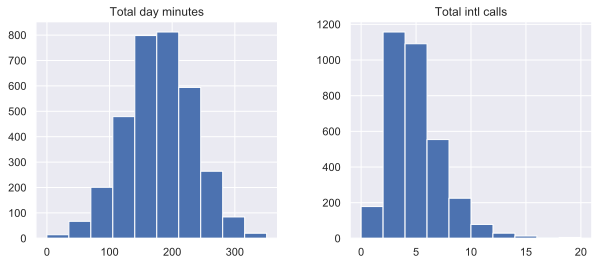

In [4]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

Kernel density plots are smoothed Histogram plots and are independent of number of bins to view.

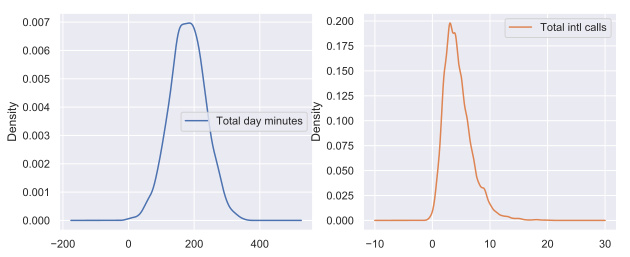

In [5]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

seaborn distplot() plots KDE overlayed on histogram.

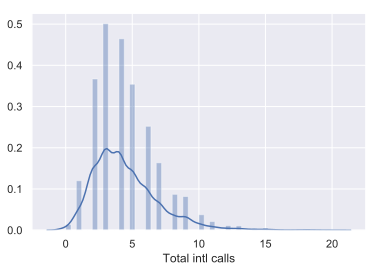

In [6]:
sns.distplot(df['Total intl calls']);

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin.

##### Box plot

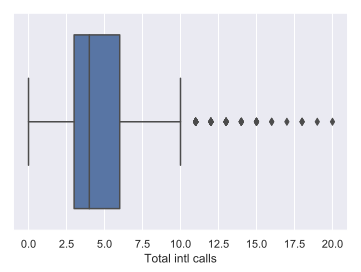

In [7]:
sns.boxplot(x='Total intl calls', data=df);

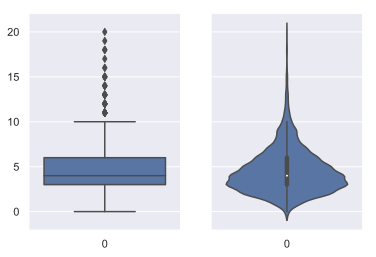

In [8]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [9]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


#### 2.2 Categorical and binary features

*Categorical features* take on a fixed number of values.

*Binary* variables are an important special case of categorical variables when the number of possible values is exactly 2. 

If the values of a categorical variable are ordered, it is called *ordinal*.

In [10]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

#### Barplot

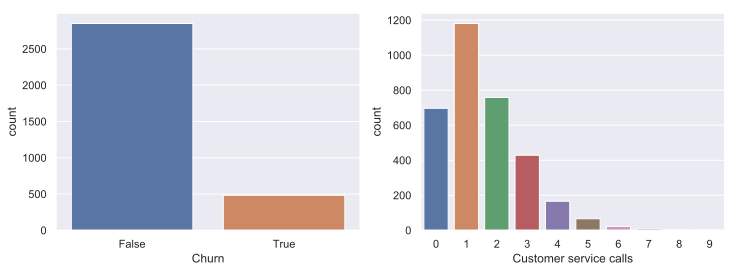

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

## 3. Multivariate visualization

*Multivariate* plots allow us to see relationships between two and more variables, all in one figure. 

#### 3.1 Quantitative vs. Quantitative

##### Correlation matrix


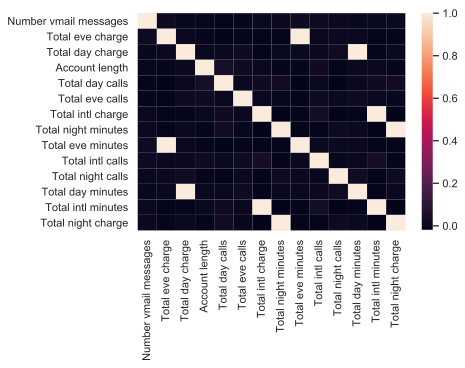

In [12]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

From the colored correlation matrix generated above, we can see that there are 4 variables such as *Total day charge* that have been calculated directly from the number of minutes spent on phone calls (*Total day minutes*). These are called *dependent* variables and can therefore be left out since they do not contribute any additional information. Let's get rid of them:

In [13]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

##### Scatter plot

The *scatter plot* displays values of two numerical variables as *Cartesian coordinates* in 2D space.

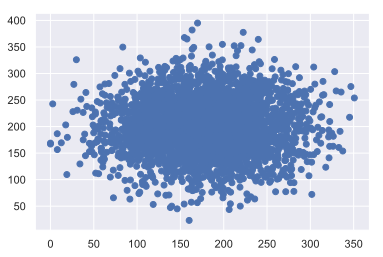

In [14]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

There is a slightly fancier option to create a scatter plot with the `seaborn` library:

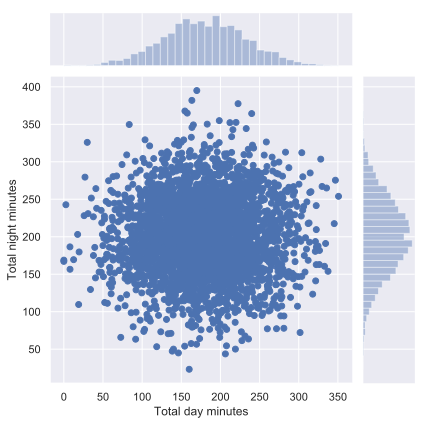

In [15]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

The function [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) plots two histograms that may be useful in some cases.

Using the same function, we can also get a smoothed version of our bivariate distribution:

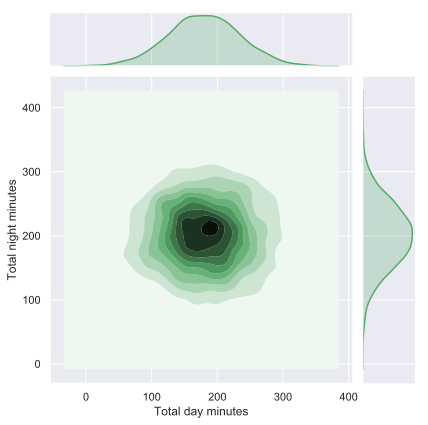

In [16]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");

This is basically a bivariate version of the *Kernel Density Plot* discussed earlier.

##### Scatterplot matrix

In some cases, we may want to plot a *scatterplot matrix* such as the one shown below. Its diagonal contains the distributions of the corresponding variables, and the scatter plots for each pair of variables fill the rest of the matrix.

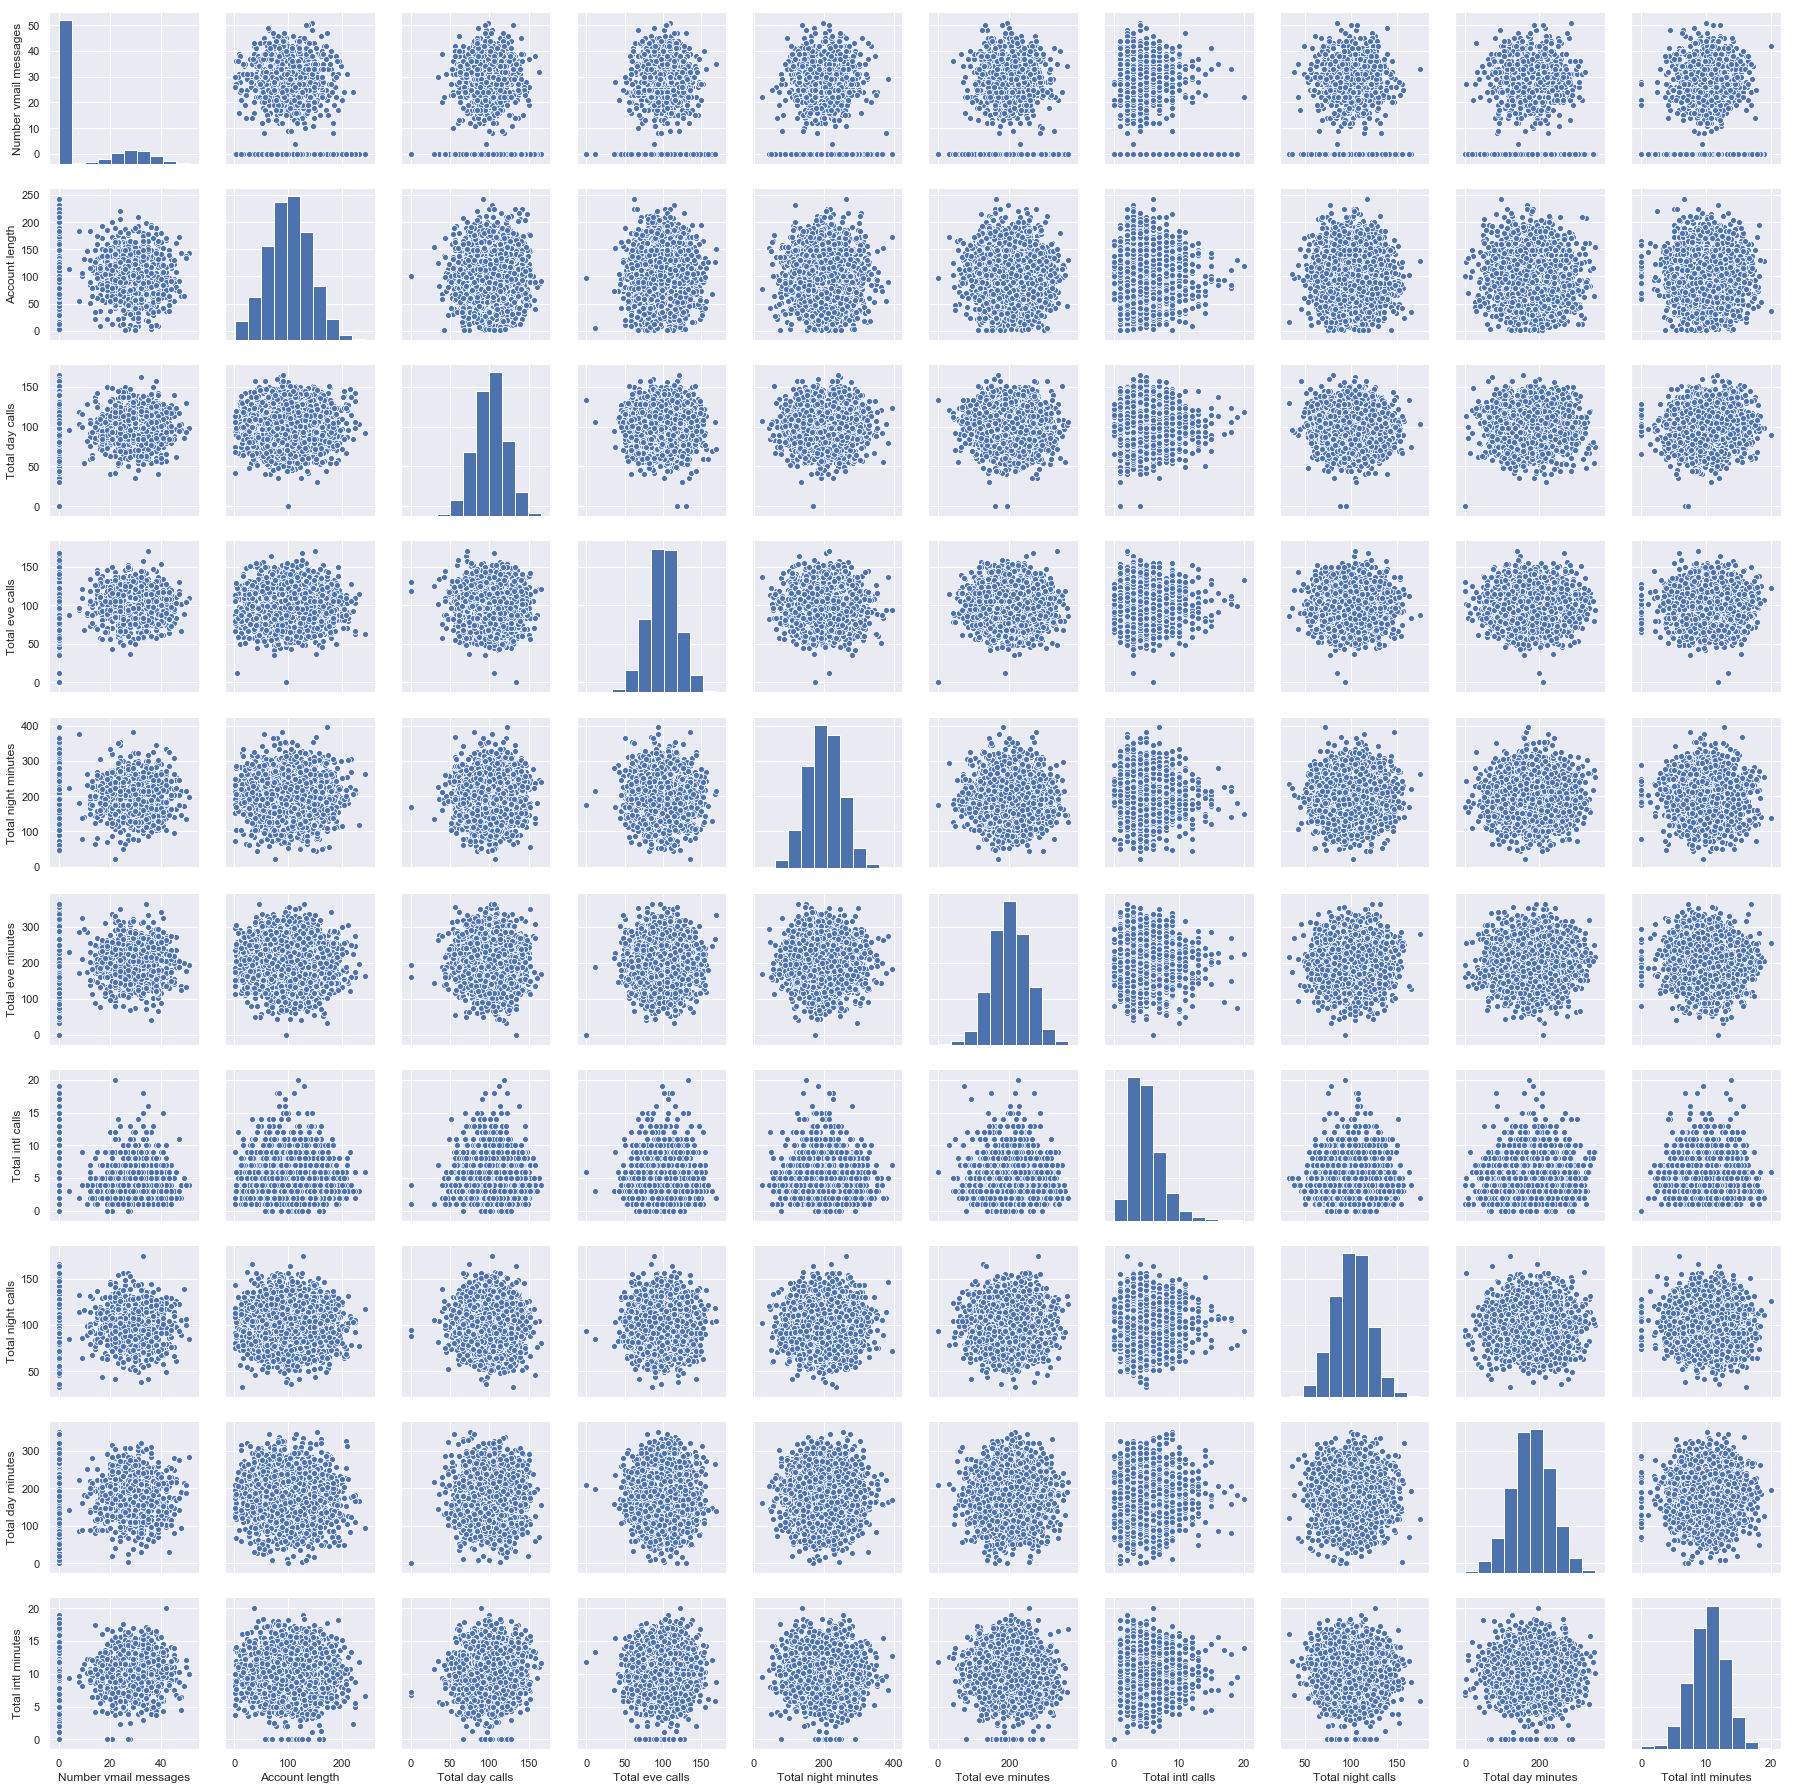

In [17]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

Sometimes, such a visualization may help draw conclusions about data; but, in this case, everything is pretty clear with no surprises.

#### 3.2 Quantitative vs. Categorical

In this section, we will make our simple quantitative plots a little more exciting. We will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

More specifically, let's see how the input variables are related to the target variable Churn.

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the `scatter()` function seen above, but, let's try a new function called [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) and use the parameter `hue` to indicate our categorical feature of interest:

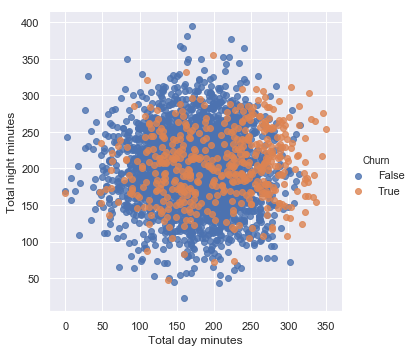

In [18]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (`Churn=False`) and those who left (`Churn=True`).

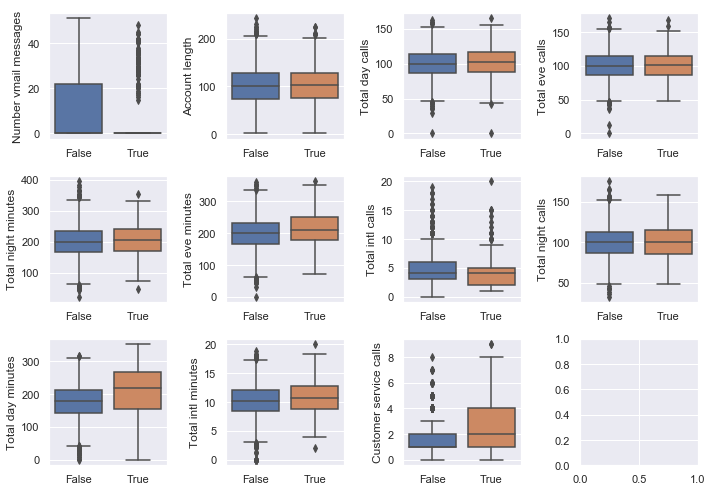

In [19]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

*Total day minutes*, *Customer service calls*, and *Number vmail messages*.

Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for *Total day minutes* grouped by the target variable.

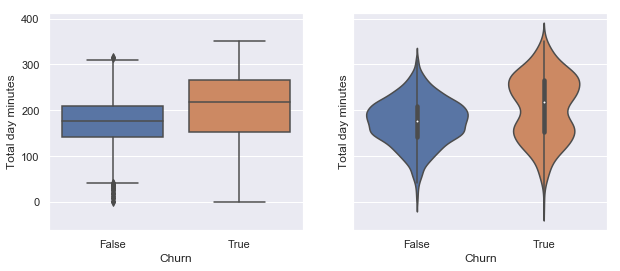

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

**An interesting observation**: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the `seaborn` library called [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html). For example, let's visualize the interaction between *Total day minutes* and two categorical variables in the same plot:

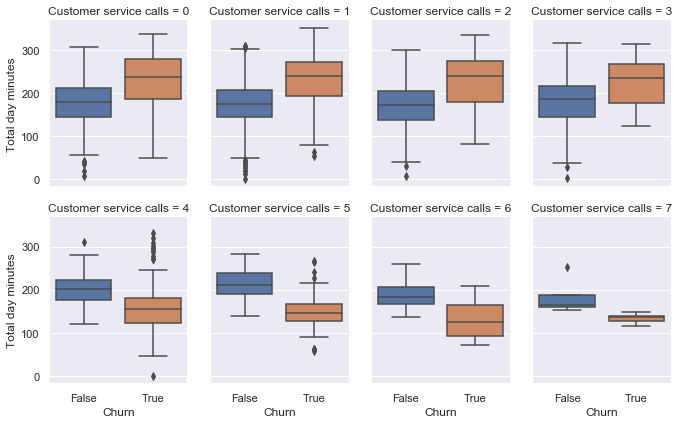

In [21]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

From this, we could conclude that, starting with 4 calls, *Total day minutes* may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

#### 3.3 Categorical vs. Categorical

As we saw earlier in this article, the variable *Customer service calls* has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a *count plot*. Now, we are interested in the relationship between this ordinal feature and the target variable *Churn*.

Let's look at the distribution of the number of calls to customer service, again using a *count plot*. This time, let's also pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

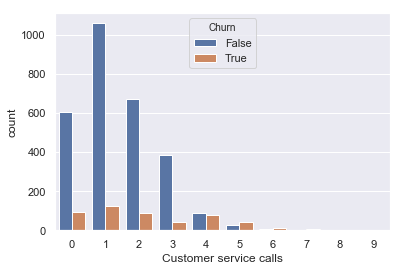

In [22]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

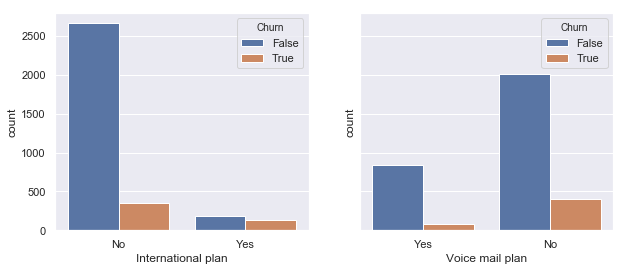

In [23]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

##### Contingency table

Let's try to see how *Churn* rate is related to the categorical variable *State* by creating a cross tabulation:

In [24]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In the case of *State*, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:

In [25]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


At first glance, it seems that the churn rate in *New Jersey* and *California* are above 25% and less than 6% for Hawaii and Alaska.